In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../../data/mushroom_classification.csv')

print(f'Number of rows - {df.shape[0]} \nNumber of cols - {df.shape[1]}')

df.head()

Number of rows - 54035 
Number of cols - 9


,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
g = df.groupby('class')[['cap_diameter','stem_height','stem_width']].mean()
g

,cap_diameter,stem_height,stem_width
class,,,
0,633.064696,0.627374,1208.915189
1,513.236293,0.867251,921.516563


<Axes: >

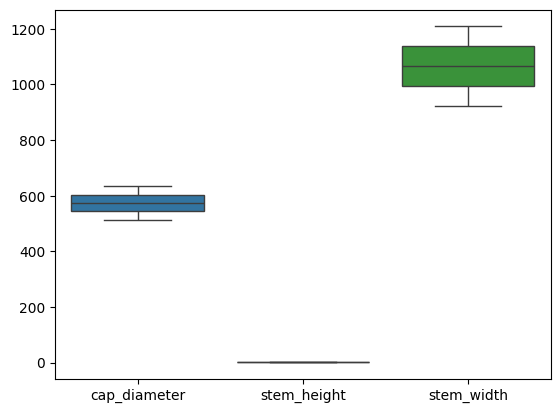

In [8]:
sns.boxplot(g)

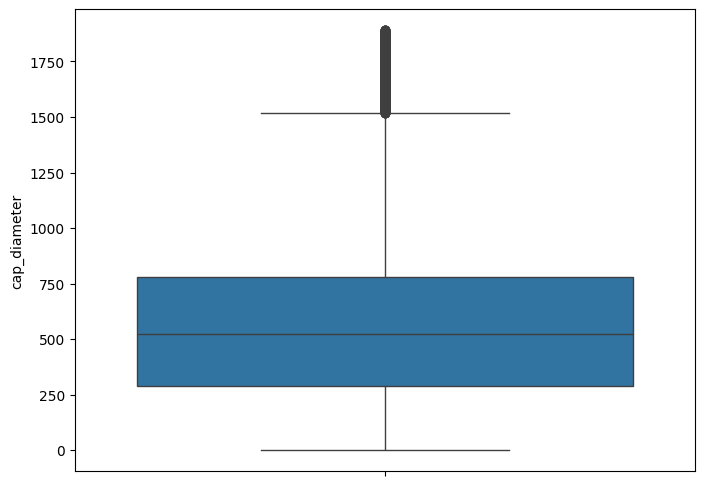

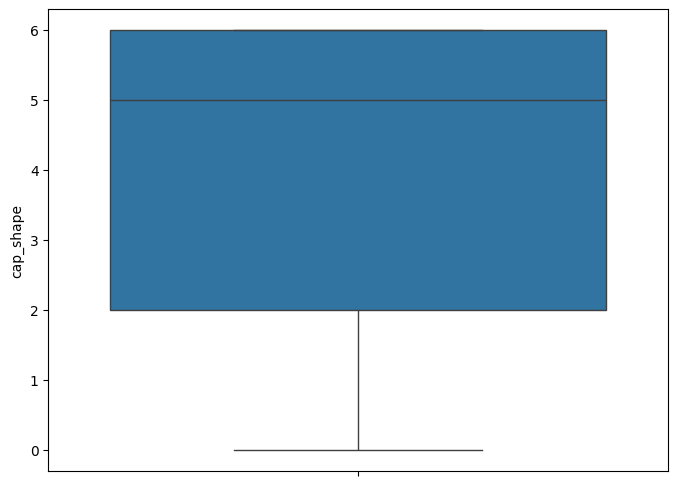

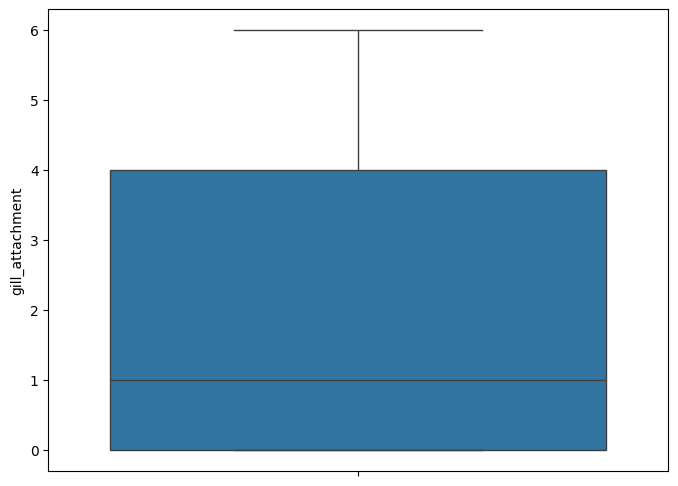

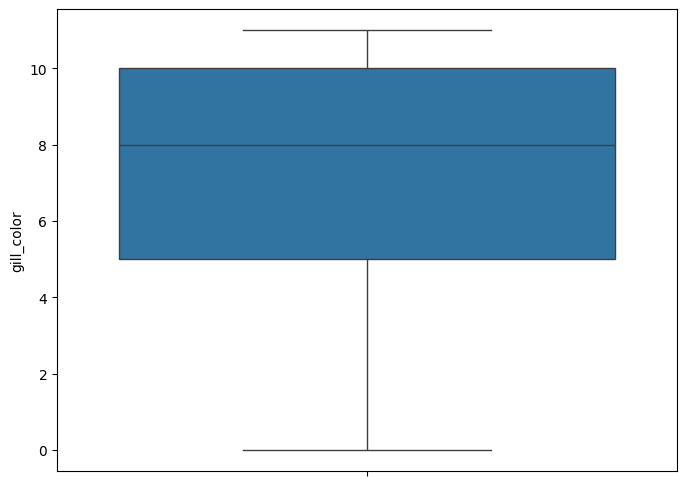

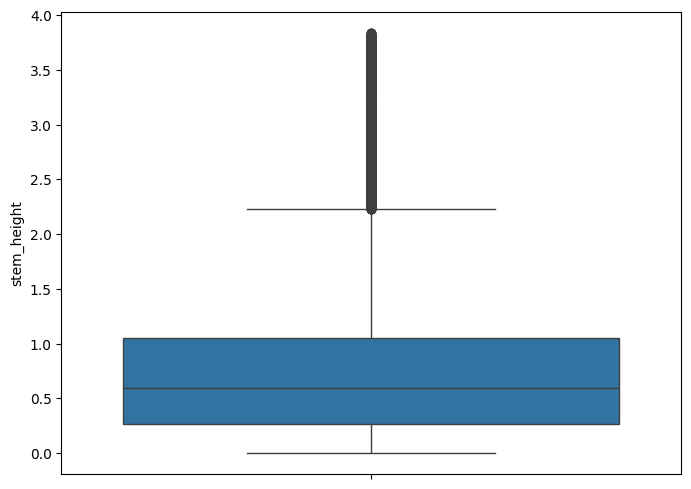

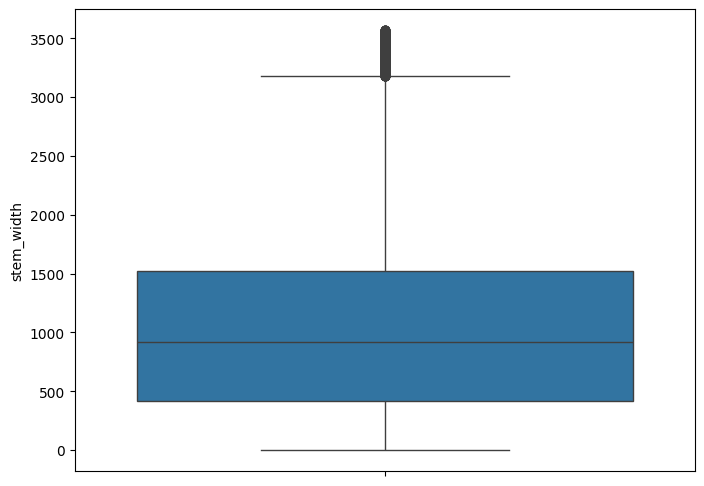

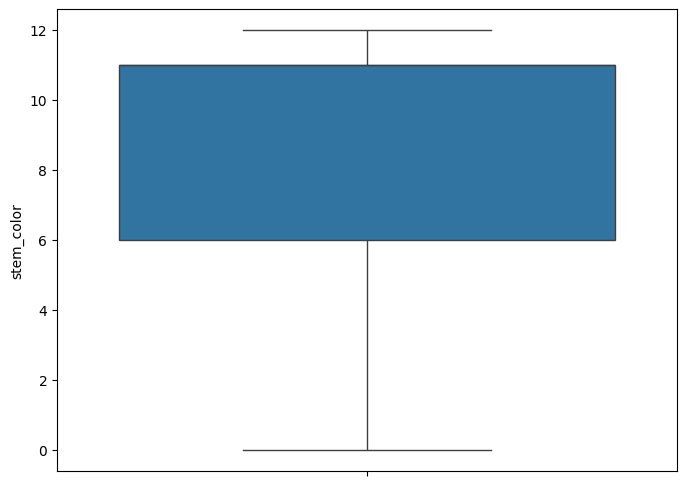

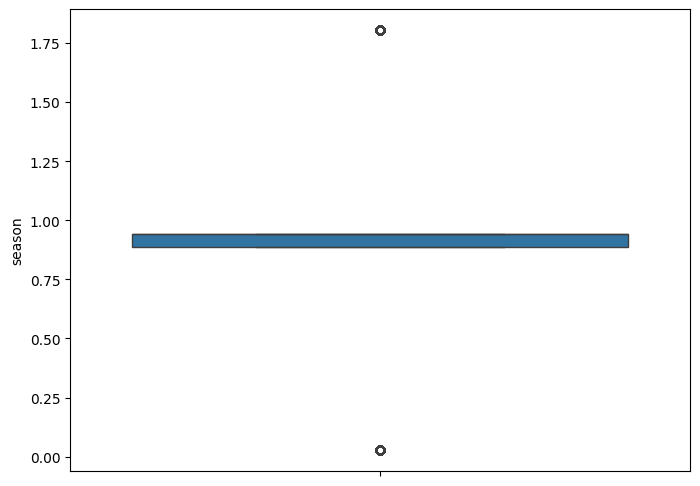

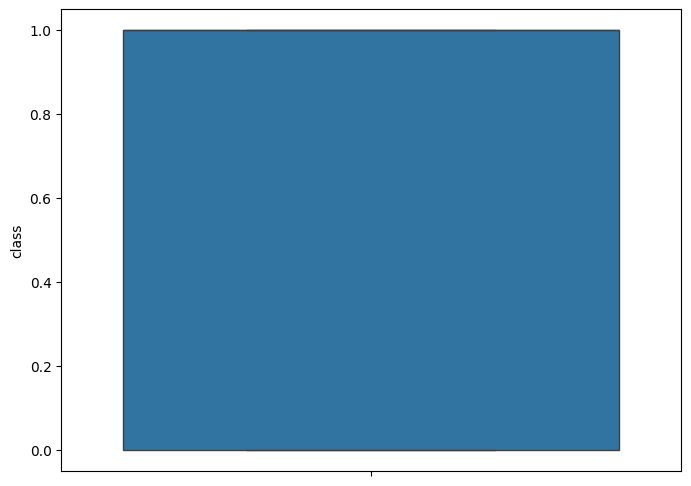

In [13]:
for x in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(df[x])

In [15]:
x = df.drop('class',axis=1)
y = df['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

In [17]:
lr = lr.fit(x_train,y_train)
dt = dt.fit(x_train,y_train)
gb = gb.fit(x_train,y_train)

/Users/mohitrajnayak/Data Sci Work/Data Sci REPO/Machine-Learning/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
lr_y_pred = lr.predict(x_test)
dt_y_pred = dt.predict(x_test)
gb_y_pred = gb.predict(x_test)

In [19]:
lr_cr = classification_report(y_test,lr_y_pred)
dt_cr = classification_report(y_test,dt_y_pred)
gb_cr = classification_report(y_test,gb_y_pred)

In [20]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      4909
           1       0.65      0.69      0.67      5898

    accuracy                           0.63     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.63      0.63     10807



In [21]:
print(dt_cr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807



In [22]:
print(gb_cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4909
           1       0.90      0.89      0.89      5898

    accuracy                           0.88     10807
   macro avg       0.88      0.88      0.88     10807
weighted avg       0.88      0.88      0.88     10807



In [29]:
models = {
    'lr' : LogisticRegression(),
    'dt' : DecisionTreeClassifier(),
    'gb' : GradientBoostingClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    cr = classification_report(y_test,y_pred)
    
    print(list(models.keys())[i])
    
    print(f'classification_report \n{cr}')
    
    print('-'*60)
    print('\n')

lr
classification_report 
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      4909
           1       0.65      0.69      0.67      5898

    accuracy                           0.63     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.63      0.63     10807

------------------------------------------------------------


dt
classification_report 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4909
           1       0.98      0.98      0.98      5898

    accuracy                           0.98     10807
   macro avg       0.98      0.98      0.98     10807
weighted avg       0.98      0.98      0.98     10807

------------------------------------------------------------


gb
classification_report 
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4909
           1       0.90      0.89